In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 21 15:48:22 2019

@author: jaide
"""

import pandas as pd
import numpy as np
import tkinter as tk
from tkinter.filedialog import askdirectory
import os
import cv2
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

"""Function to import training data set. When run, point to the parent folder containing all subfolders for each class."""
def import_data():
    
    root = tk.Tk()
    #arr = np.empty((0,100,100,3), int)
    arr=[]
    y=[]
    name = askdirectory(title = "Select folder")
    root.update()
    root.withdraw()
    print(name)
    sub_folders=os.listdir(name)
    for folder in sub_folders:
        print(name+"/"+folder)
        print(len(os.listdir(name+"/"+folder)))
        files=os.listdir(name+"/"+folder)
        
        for f in files:
            image = cv2.imread(name+"/"+folder+"/"+f)
            #uncomment the line below to test a different color space
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
            image = np.array(image, dtype=np.uint8)
            dim = (100,100)
            y.append(folder)
            # perform the actual resizing of the image and show it
            resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
            arr.append(resized)
            print(f,y[len(y)-1])
    
    return (np.asarray(arr),np.asarray(y))
    



Using TensorFlow backend.


In [2]:
df,y=import_data()

C:/Users/jaide/color/color_clean
C:/Users/jaide/color/color_clean/black
3442
black_0.jpg black
black_1.jpg black
black_10.jpg black
black_100.jpg black
black_1000.jpg black
black_1001.jpg black
black_1002.jpg black
black_1003.jpg black
black_1004.jpg black
black_1005.jpg black
black_1006.jpg black
black_1007.jpg black
black_1008.jpg black
black_1009.jpg black
black_101.jpg black
black_1010.jpg black
black_1011.jpg black
black_1012.jpg black
black_1013.jpg black
black_1014.jpg black
black_1015.jpg black
black_1016.jpg black
black_1017.jpg black
black_1018.jpg black
black_1019.jpg black
black_102.jpg black
black_1020.jpg black
black_1021.jpg black
black_1022.jpg black
black_1023.jpg black
black_1024.jpg black
black_1025.jpg black
black_1026.jpg black
black_1027.jpg black
black_1028.jpg black
black_1029.jpg black
black_103.jpg black
black_1030.jpg black
black_1031.jpg black
black_1032.jpg black
black_1033.jpg black
black_1034.jpg black
black_1035.jpg black
black_1036.jpg black
black_1037.

black_1350.jpg black
black_1351.jpg black
black_1352.jpg black
black_1353.jpg black
black_1354.jpg black
black_1355.jpg black
black_1356.jpg black
black_1357.jpg black
black_1358.jpg black
black_1359.jpg black
black_136.jpg black
black_1360.jpg black
black_1361.jpg black
black_1362.jpg black
black_1363.jpg black
black_1364.jpg black
black_1365.jpg black
black_1366.jpg black
black_1367.jpg black
black_1368.jpg black
black_1369.jpg black
black_137.jpg black
black_1370.jpg black
black_1371.jpg black
black_1372.jpg black
black_1373.jpg black
black_1374.jpg black
black_1375.jpg black
black_1376.jpg black
black_1377.jpg black
black_1378.jpg black
black_1379.jpg black
black_138.jpg black
black_1380.jpg black
black_1381.jpg black
black_1382.jpg black
black_1383.jpg black
black_1384.jpg black
black_1385.jpg black
black_1386.jpg black
black_1387.jpg black
black_1388.jpg black
black_1389.jpg black
black_139.jpg black
black_1390.jpg black
black_1391.jpg black
black_1392.jpg black
black_1393.jpg bl

black_1725.jpg black
black_1726.jpg black
black_1727.jpg black
black_1728.jpg black
black_1729.jpg black
black_173.jpg black
black_1730.jpg black
black_1731.jpg black
black_1732.jpg black
black_1733.jpg black
black_1734.jpg black
black_1735.jpg black
black_1736.jpg black
black_1737.jpg black
black_1738.jpg black
black_1739.jpg black
black_174.jpg black
black_1740.jpg black
black_1741.jpg black
black_1742.jpg black
black_1743.jpg black
black_1744.jpg black
black_1745.jpg black
black_1746.jpg black
black_1747.jpg black
black_1748.jpg black
black_1749.jpg black
black_175.jpg black
black_1750.jpg black
black_1751.jpg black
black_1752.jpg black
black_1753.jpg black
black_1754.jpg black
black_1755.jpg black
black_1756.jpg black
black_1757.jpg black
black_1758.jpg black
black_1759.jpg black
black_176.jpg black
black_1760.jpg black
black_1761.jpg black
black_1762.jpg black
black_1763.jpg black
black_1764.jpg black
black_1765.jpg black
black_1766.jpg black
black_1767.jpg black
black_1768.jpg bl

black_2081.jpg black
black_2082.jpg black
black_2083.jpg black
black_2084.jpg black
black_2085.jpg black
black_2086.jpg black
black_2087.jpg black
black_2088.jpg black
black_2089.jpg black
black_209.jpg black
black_2090.jpg black
black_2091.jpg black
black_2092.jpg black
black_2093.jpg black
black_2094.jpg black
black_2095.jpg black
black_2096.jpg black
black_2097.jpg black
black_2098.jpg black
black_2099.jpg black
black_21.jpg black
black_210.jpg black
black_2100.jpg black
black_2101.jpg black
black_2102.jpg black
black_2103.jpg black
black_2104.jpg black
black_2105.jpg black
black_2106.jpg black
black_2107.jpg black
black_2108.jpg black
black_2109.jpg black
black_211.jpg black
black_2110.jpg black
black_2111.jpg black
black_2112.jpg black
black_2113.jpg black
black_2114.jpg black
black_2115.jpg black
black_2116.jpg black
black_2117.jpg black
black_2118.jpg black
black_2119.jpg black
black_212.jpg black
black_2120.jpg black
black_2121.jpg black
black_2122.jpg black
black_2123.jpg blac

black_2438.jpg black
black_2439.jpg black
black_244.jpg black
black_2440.jpg black
black_2441.jpg black
black_2442.jpg black
black_2443.jpg black
black_2444.jpg black
black_2445.jpg black
black_2446.jpg black
black_2447.jpg black
black_2448.jpg black
black_2449.jpg black
black_245.jpg black
black_2450.jpg black
black_2451.jpg black
black_2452.jpg black
black_2453.jpg black
black_2454.jpg black
black_2455.jpg black
black_2456.jpg black
black_2457.jpg black
black_2458.jpg black
black_2459.jpg black
black_246.jpg black
black_2460.jpg black
black_2461.jpg black
black_2462.jpg black
black_2463.jpg black
black_2464.jpg black
black_2465.jpg black
black_2466.jpg black
black_2467.jpg black
black_2468.jpg black
black_2469.jpg black
black_247.jpg black
black_2470.jpg black
black_2471.jpg black
black_2472.jpg black
black_2473.jpg black
black_2474.jpg black
black_2475.jpg black
black_2476.jpg black
black_2477.jpg black
black_2478.jpg black
black_2479.jpg black
black_248.jpg black
black_2480.jpg bla

black_2806.jpg black
black_2807.jpg black
black_2808.jpg black
black_2809.jpg black
black_281.jpg black
black_2810.jpg black
black_2811.jpg black
black_2812.jpg black
black_2813.jpg black
black_2814.jpg black
black_2815.jpg black
black_2816.jpg black
black_2817.jpg black
black_2818.jpg black
black_2819.jpg black
black_282.jpg black
black_2820.jpg black
black_2821.jpg black
black_2822.jpg black
black_2823.jpg black
black_2824.jpg black
black_2825.jpg black
black_2826.jpg black
black_2827.jpg black
black_2828.jpg black
black_2829.jpg black
black_283.jpg black
black_2830.jpg black
black_2831.jpg black
black_2832.jpg black
black_2833.jpg black
black_2834.jpg black
black_2835.jpg black
black_2836.jpg black
black_2837.jpg black
black_2838.jpg black
black_2839.jpg black
black_284.jpg black
black_2840.jpg black
black_2841.jpg black
black_2842.jpg black
black_2843.jpg black
black_2844.jpg black
black_2845.jpg black
black_2846.jpg black
black_2847.jpg black
black_2848.jpg black
black_2849.jpg bl

black_3167.jpg black
black_3168.jpg black
black_3169.jpg black
black_317.jpg black
black_3170.jpg black
black_3171.jpg black
black_3172.jpg black
black_3173.jpg black
black_3174.jpg black
black_3175.jpg black
black_3176.jpg black
black_3177.jpg black
black_3178.jpg black
black_3179.jpg black
black_318.jpg black
black_3180.jpg black
black_3181.jpg black
black_3182.jpg black
black_3183.jpg black
black_3184.jpg black
black_3185.jpg black
black_3186.jpg black
black_3187.jpg black
black_3188.jpg black
black_3189.jpg black
black_319.jpg black
black_3190.jpg black
black_3191.jpg black
black_3192.jpg black
black_3193.jpg black
black_3194.jpg black
black_3195.jpg black
black_3196.jpg black
black_3197.jpg black
black_3198.jpg black
black_3199.jpg black
black_32.jpg black
black_320.jpg black
black_3200.jpg black
black_3201.jpg black
black_3202.jpg black
black_3203.jpg black
black_3204.jpg black
black_3205.jpg black
black_3206.jpg black
black_3207.jpg black
black_3208.jpg black
black_3209.jpg blac

black_44.jpg black
black_440.jpg black
black_441.jpg black
black_442.jpg black
black_443.jpg black
black_444.jpg black
black_445.jpg black
black_446.jpg black
black_447.jpg black
black_448.jpg black
black_449.jpg black
black_45.jpg black
black_450.jpg black
black_451.jpg black
black_452.jpg black
black_453.jpg black
black_454.jpg black
black_455.jpg black
black_456.jpg black
black_457.jpg black
black_458.jpg black
black_459.jpg black
black_46.jpg black
black_460.jpg black
black_461.jpg black
black_462.jpg black
black_463.jpg black
black_464.jpg black
black_465.jpg black
black_466.jpg black
black_467.jpg black
black_468.jpg black
black_469.jpg black
black_47.jpg black
black_470.jpg black
black_471.jpg black
black_472.jpg black
black_473.jpg black
black_474.jpg black
black_475.jpg black
black_476.jpg black
black_477.jpg black
black_478.jpg black
black_479.jpg black
black_48.jpg black
black_480.jpg black
black_481.jpg black
black_482.jpg black
black_483.jpg black
black_484.jpg black
black

black_830.jpg black
black_831.jpg black
black_832.jpg black
black_833.jpg black
black_834.jpg black
black_835.jpg black
black_836.jpg black
black_837.jpg black
black_838.jpg black
black_839.jpg black
black_84.jpg black
black_840.jpg black
black_841.jpg black
black_842.jpg black
black_843.jpg black
black_844.jpg black
black_845.jpg black
black_846.jpg black
black_847.jpg black
black_848.jpg black
black_849.jpg black
black_85.jpg black
black_850.jpg black
black_851.jpg black
black_852.jpg black
black_853.jpg black
black_854.jpg black
black_855.jpg black
black_856.jpg black
black_857.jpg black
black_858.jpg black
black_859.jpg black
black_86.jpg black
black_860.jpg black
black_861.jpg black
black_862.jpg black
black_863.jpg black
black_864.jpg black
black_865.jpg black
black_866.jpg black
black_867.jpg black
black_868.jpg black
black_869.jpg black
black_87.jpg black
black_870.jpg black
black_871.jpg black
black_872.jpg black
black_873.jpg black
black_874.jpg black
black_875.jpg black
blac

blue_251.jpg blue
blue_252.jpg blue
blue_253.jpg blue
blue_254.jpg blue
blue_255.jpg blue
blue_256.jpg blue
blue_257.jpg blue
blue_258.jpg blue
blue_259.jpg blue
blue_26.jpg blue
blue_260.jpg blue
blue_261.jpg blue
blue_262.jpg blue
blue_263.jpg blue
blue_264.jpg blue
blue_265.jpg blue
blue_266.jpg blue
blue_267.jpg blue
blue_268.jpg blue
blue_269.jpg blue
blue_27.jpg blue
blue_270.jpg blue
blue_271.jpg blue
blue_272.jpg blue
blue_273.jpg blue
blue_274.jpg blue
blue_275.jpg blue
blue_276.jpg blue
blue_277.jpg blue
blue_278.jpg blue
blue_279.jpg blue
blue_28.jpg blue
blue_280.jpg blue
blue_281.jpg blue
blue_282.jpg blue
blue_283.jpg blue
blue_284.jpg blue
blue_285.jpg blue
blue_286.jpg blue
blue_287.jpg blue
blue_288.jpg blue
blue_289.jpg blue
blue_29.jpg blue
blue_290.jpg blue
blue_291.jpg blue
blue_292.jpg blue
blue_293.jpg blue
blue_294.jpg blue
blue_295.jpg blue
blue_296.jpg blue
blue_297.jpg blue
blue_298.jpg blue
blue_299.jpg blue
blue_3.jpg blue
blue_30.jpg blue
blue_300.jpg blue

blue_68.jpg blue
blue_680.jpg blue
blue_681.jpg blue
blue_682.jpg blue
blue_683.jpg blue
blue_684.jpg blue
blue_685.jpg blue
blue_686.jpg blue
blue_687.jpg blue
blue_688.jpg blue
blue_689.jpg blue
blue_69.jpg blue
blue_690.jpg blue
blue_691.jpg blue
blue_692.jpg blue
blue_693.jpg blue
blue_694.jpg blue
blue_695.jpg blue
blue_696.jpg blue
blue_697.jpg blue
blue_698.jpg blue
blue_699.jpg blue
blue_7.jpg blue
blue_70.jpg blue
blue_700.jpg blue
blue_701.jpg blue
blue_702.jpg blue
blue_703.jpg blue
blue_704.jpg blue
blue_705.jpg blue
blue_706.jpg blue
blue_707.jpg blue
blue_708.jpg blue
blue_709.jpg blue
blue_71.jpg blue
blue_710.jpg blue
blue_711.jpg blue
blue_712.jpg blue
blue_713.jpg blue
blue_714.jpg blue
blue_715.jpg blue
blue_716.jpg blue
blue_717.jpg blue
blue_718.jpg blue
blue_719.jpg blue
blue_72.jpg blue
blue_720.jpg blue
blue_721.jpg blue
blue_722.jpg blue
blue_723.jpg blue
blue_724.jpg blue
blue_725.jpg blue
blue_726.jpg blue
blue_727.jpg blue
blue_728.jpg blue
blue_729.jpg blue

cyan_201.jpg cyan
cyan_202.jpg cyan
cyan_203.jpg cyan
cyan_204.jpg cyan
cyan_205.jpg cyan
cyan_206.jpg cyan
cyan_207.jpg cyan
cyan_208.jpg cyan
cyan_209.jpg cyan
cyan_21.jpg cyan
cyan_210.jpg cyan
cyan_211.jpg cyan
cyan_212.jpg cyan
cyan_213.jpg cyan
cyan_214.jpg cyan
cyan_215.jpg cyan
cyan_216.jpg cyan
cyan_217.jpg cyan
cyan_218.jpg cyan
cyan_219.jpg cyan
cyan_22.jpg cyan
cyan_220.jpg cyan
cyan_221.jpg cyan
cyan_222.jpg cyan
cyan_223.jpg cyan
cyan_224.jpg cyan
cyan_225.jpg cyan
cyan_226.jpg cyan
cyan_227.jpg cyan
cyan_228.jpg cyan
cyan_229.jpg cyan
cyan_23.jpg cyan
cyan_230.jpg cyan
cyan_231.jpg cyan
cyan_232.jpg cyan
cyan_233.jpg cyan
cyan_234.jpg cyan
cyan_235.jpg cyan
cyan_236.jpg cyan
cyan_237.jpg cyan
cyan_238.jpg cyan
cyan_239.jpg cyan
cyan_24.jpg cyan
cyan_240.jpg cyan
cyan_241.jpg cyan
cyan_242.jpg cyan
cyan_243.jpg cyan
cyan_244.jpg cyan
cyan_245.jpg cyan
cyan_246.jpg cyan
cyan_247.jpg cyan
cyan_248.jpg cyan
cyan_249.jpg cyan
cyan_25.jpg cyan
cyan_250.jpg cyan
cyan_251.jpg cy

gray_1252.jpg gray
gray_1253.jpg gray
gray_1254.jpg gray
gray_1255.jpg gray
gray_1256.jpg gray
gray_1257.jpg gray
gray_1258.jpg gray
gray_1259.jpg gray
gray_126.jpg gray
gray_1260.jpg gray
gray_1261.jpg gray
gray_1262.jpg gray
gray_1263.jpg gray
gray_1264.jpg gray
gray_1265.jpg gray
gray_1266.jpg gray
gray_1267.jpg gray
gray_1268.jpg gray
gray_1269.jpg gray
gray_127.jpg gray
gray_1270.jpg gray
gray_1271.jpg gray
gray_1272.jpg gray
gray_1273.jpg gray
gray_1274.jpg gray
gray_1275.jpg gray
gray_1276.jpg gray
gray_1277.jpg gray
gray_1278.jpg gray
gray_1279.jpg gray
gray_128.jpg gray
gray_1280.jpg gray
gray_1281.jpg gray
gray_1282.jpg gray
gray_1283.jpg gray
gray_1284.jpg gray
gray_1285.jpg gray
gray_1286.jpg gray
gray_1287.jpg gray
gray_1288.jpg gray
gray_1289.jpg gray
gray_129.jpg gray
gray_1290.jpg gray
gray_1291.jpg gray
gray_1292.jpg gray
gray_1293.jpg gray
gray_1294.jpg gray
gray_1295.jpg gray
gray_1296.jpg gray
gray_1297.jpg gray
gray_1298.jpg gray
gray_1299.jpg gray
gray_13.jpg gray

gray_1647.jpg gray
gray_1648.jpg gray
gray_1649.jpg gray
gray_165.jpg gray
gray_1650.jpg gray
gray_1651.jpg gray
gray_1652.jpg gray
gray_1653.jpg gray
gray_1654.jpg gray
gray_1655.jpg gray
gray_1656.jpg gray
gray_1657.jpg gray
gray_1658.jpg gray
gray_1659.jpg gray
gray_166.jpg gray
gray_1660.jpg gray
gray_1661.jpg gray
gray_1662.jpg gray
gray_1663.jpg gray
gray_1664.jpg gray
gray_1665.jpg gray
gray_1666.jpg gray
gray_1667.jpg gray
gray_1668.jpg gray
gray_1669.jpg gray
gray_167.jpg gray
gray_1670.jpg gray
gray_1671.jpg gray
gray_1672.jpg gray
gray_1673.jpg gray
gray_1674.jpg gray
gray_1675.jpg gray
gray_1676.jpg gray
gray_1677.jpg gray
gray_1678.jpg gray
gray_1679.jpg gray
gray_168.jpg gray
gray_1680.jpg gray
gray_1681.jpg gray
gray_1682.jpg gray
gray_1683.jpg gray
gray_1684.jpg gray
gray_1685.jpg gray
gray_1686.jpg gray
gray_1687.jpg gray
gray_1688.jpg gray
gray_1689.jpg gray
gray_169.jpg gray
gray_1690.jpg gray
gray_1691.jpg gray
gray_1692.jpg gray
gray_1693.jpg gray
gray_1694.jpg gra

gray_2039.jpg gray
gray_204.jpg gray
gray_2040.jpg gray
gray_2041.jpg gray
gray_2042.jpg gray
gray_2043.jpg gray
gray_2044.jpg gray
gray_2045.jpg gray
gray_2046.jpg gray
gray_2047.jpg gray
gray_2048.jpg gray
gray_2049.jpg gray
gray_205.jpg gray
gray_2050.jpg gray
gray_2051.jpg gray
gray_2052.jpg gray
gray_2053.jpg gray
gray_2054.jpg gray
gray_2055.jpg gray
gray_2056.jpg gray
gray_2057.jpg gray
gray_2058.jpg gray
gray_2059.jpg gray
gray_206.jpg gray
gray_2060.jpg gray
gray_2061.jpg gray
gray_2062.jpg gray
gray_2063.jpg gray
gray_2064.jpg gray
gray_2065.jpg gray
gray_2066.jpg gray
gray_2067.jpg gray
gray_2068.jpg gray
gray_2069.jpg gray
gray_207.jpg gray
gray_2070.jpg gray
gray_2071.jpg gray
gray_2072.jpg gray
gray_2073.jpg gray
gray_2074.jpg gray
gray_2075.jpg gray
gray_2076.jpg gray
gray_2077.jpg gray
gray_2078.jpg gray
gray_2079.jpg gray
gray_208.jpg gray
gray_2080.jpg gray
gray_2081.jpg gray
gray_2082.jpg gray
gray_2083.jpg gray
gray_2084.jpg gray
gray_2085.jpg gray
gray_2086.jpg gra

gray_2430.jpg gray
gray_2431.jpg gray
gray_2432.jpg gray
gray_2433.jpg gray
gray_2434.jpg gray
gray_2435.jpg gray
gray_2436.jpg gray
gray_2437.jpg gray
gray_2438.jpg gray
gray_2439.jpg gray
gray_244.jpg gray
gray_2440.jpg gray
gray_2441.jpg gray
gray_2442.jpg gray
gray_2443.jpg gray
gray_2444.jpg gray
gray_2445.jpg gray
gray_2446.jpg gray
gray_2447.jpg gray
gray_2448.jpg gray
gray_2449.jpg gray
gray_245.jpg gray
gray_2450.jpg gray
gray_2451.jpg gray
gray_2452.jpg gray
gray_2453.jpg gray
gray_2454.jpg gray
gray_2455.jpg gray
gray_2456.jpg gray
gray_2457.jpg gray
gray_2458.jpg gray
gray_2459.jpg gray
gray_246.jpg gray
gray_2460.jpg gray
gray_2461.jpg gray
gray_2462.jpg gray
gray_2463.jpg gray
gray_2464.jpg gray
gray_2465.jpg gray
gray_2466.jpg gray
gray_2467.jpg gray
gray_2468.jpg gray
gray_2469.jpg gray
gray_247.jpg gray
gray_2470.jpg gray
gray_2471.jpg gray
gray_2472.jpg gray
gray_2473.jpg gray
gray_2474.jpg gray
gray_2475.jpg gray
gray_2476.jpg gray
gray_2477.jpg gray
gray_2478.jpg gr

gray_2827.jpg gray
gray_2828.jpg gray
gray_2829.jpg gray
gray_283.jpg gray
gray_2830.jpg gray
gray_2831.jpg gray
gray_2832.jpg gray
gray_2833.jpg gray
gray_2834.jpg gray
gray_2835.jpg gray
gray_2836.jpg gray
gray_2837.jpg gray
gray_2838.jpg gray
gray_2839.jpg gray
gray_284.jpg gray
gray_2840.jpg gray
gray_2841.jpg gray
gray_2842.jpg gray
gray_2843.jpg gray
gray_2844.jpg gray
gray_2845.jpg gray
gray_2846.jpg gray
gray_2847.jpg gray
gray_2848.jpg gray
gray_2849.jpg gray
gray_285.jpg gray
gray_2850.jpg gray
gray_2851.jpg gray
gray_2852.jpg gray
gray_2853.jpg gray
gray_2854.jpg gray
gray_2855.jpg gray
gray_2856.jpg gray
gray_2857.jpg gray
gray_2858.jpg gray
gray_2859.jpg gray
gray_286.jpg gray
gray_2860.jpg gray
gray_2861.jpg gray
gray_2862.jpg gray
gray_2863.jpg gray
gray_2864.jpg gray
gray_2865.jpg gray
gray_2866.jpg gray
gray_2867.jpg gray
gray_2868.jpg gray
gray_2869.jpg gray
gray_287.jpg gray
gray_2870.jpg gray
gray_2871.jpg gray
gray_2872.jpg gray
gray_2873.jpg gray
gray_2874.jpg gra

gray_488.jpg gray
gray_489.jpg gray
gray_49.jpg gray
gray_490.jpg gray
gray_491.jpg gray
gray_492.jpg gray
gray_493.jpg gray
gray_494.jpg gray
gray_495.jpg gray
gray_496.jpg gray
gray_497.jpg gray
gray_498.jpg gray
gray_499.jpg gray
gray_5.jpg gray
gray_50.jpg gray
gray_500.jpg gray
gray_501.jpg gray
gray_502.jpg gray
gray_503.jpg gray
gray_504.jpg gray
gray_505.jpg gray
gray_506.jpg gray
gray_507.jpg gray
gray_508.jpg gray
gray_509.jpg gray
gray_51.jpg gray
gray_510.jpg gray
gray_511.jpg gray
gray_512.jpg gray
gray_513.jpg gray
gray_514.jpg gray
gray_515.jpg gray
gray_516.jpg gray
gray_517.jpg gray
gray_518.jpg gray
gray_519.jpg gray
gray_52.jpg gray
gray_520.jpg gray
gray_521.jpg gray
gray_522.jpg gray
gray_523.jpg gray
gray_524.jpg gray
gray_525.jpg gray
gray_526.jpg gray
gray_527.jpg gray
gray_528.jpg gray
gray_529.jpg gray
gray_53.jpg gray
gray_530.jpg gray
gray_531.jpg gray
gray_532.jpg gray
gray_533.jpg gray
gray_534.jpg gray
gray_535.jpg gray
gray_536.jpg gray
gray_537.jpg gray

gray_903.jpg gray
gray_904.jpg gray
gray_905.jpg gray
gray_906.jpg gray
gray_907.jpg gray
gray_908.jpg gray
gray_909.jpg gray
gray_91.jpg gray
gray_910.jpg gray
gray_911.jpg gray
gray_912.jpg gray
gray_913.jpg gray
gray_914.jpg gray
gray_915.jpg gray
gray_916.jpg gray
gray_917.jpg gray
gray_918.jpg gray
gray_919.jpg gray
gray_92.jpg gray
gray_920.jpg gray
gray_921.jpg gray
gray_922.jpg gray
gray_923.jpg gray
gray_924.jpg gray
gray_925.jpg gray
gray_926.jpg gray
gray_927.jpg gray
gray_928.jpg gray
gray_929.jpg gray
gray_93.jpg gray
gray_930.jpg gray
gray_931.jpg gray
gray_932.jpg gray
gray_933.jpg gray
gray_934.jpg gray
gray_935.jpg gray
gray_936.jpg gray
gray_937.jpg gray
gray_938.jpg gray
gray_939.jpg gray
gray_94.jpg gray
gray_940.jpg gray
gray_941.jpg gray
gray_942.jpg gray
gray_943.jpg gray
gray_944.jpg gray
gray_945.jpg gray
gray_946.jpg gray
gray_947.jpg gray
gray_948.jpg gray
gray_949.jpg gray
gray_95.jpg gray
gray_950.jpg gray
gray_951.jpg gray
gray_952.jpg gray
gray_953.jpg gr

green_389.jpg green
green_39.jpg green
green_390.jpg green
green_391.jpg green
green_392.jpg green
green_393.jpg green
green_394.jpg green
green_395.jpg green
green_396.jpg green
green_397.jpg green
green_398.jpg green
green_399.jpg green
green_4.jpg green
green_40.jpg green
green_400.jpg green
green_401.jpg green
green_402.jpg green
green_403.jpg green
green_404.jpg green
green_405.jpg green
green_406.jpg green
green_407.jpg green
green_408.jpg green
green_409.jpg green
green_41.jpg green
green_410.jpg green
green_411.jpg green
green_412.jpg green
green_413.jpg green
green_414.jpg green
green_415.jpg green
green_416.jpg green
green_417.jpg green
green_418.jpg green
green_419.jpg green
green_42.jpg green
green_420.jpg green
green_421.jpg green
green_422.jpg green
green_423.jpg green
green_424.jpg green
green_425.jpg green
green_426.jpg green
green_427.jpg green
green_428.jpg green
green_429.jpg green
green_43.jpg green
green_430.jpg green
green_431.jpg green
green_432.jpg green
green_4

red_1269.jpg red
red_127.jpg red
red_1270.jpg red
red_1271.jpg red
red_1272.jpg red
red_1273.jpg red
red_1274.jpg red
red_1275.jpg red
red_1276.jpg red
red_1277.jpg red
red_1278.jpg red
red_1279.jpg red
red_128.jpg red
red_1280.jpg red
red_1281.jpg red
red_1282.jpg red
red_1283.jpg red
red_1284.jpg red
red_1285.jpg red
red_1286.jpg red
red_1287.jpg red
red_1288.jpg red
red_1289.jpg red
red_129.jpg red
red_1290.jpg red
red_1291.jpg red
red_1292.jpg red
red_1293.jpg red
red_1294.jpg red
red_1295.jpg red
red_1296.jpg red
red_1297.jpg red
red_1298.jpg red
red_1299.jpg red
red_13.jpg red
red_130.jpg red
red_1300.jpg red
red_1301.jpg red
red_1302.jpg red
red_1303.jpg red
red_1304.jpg red
red_1305.jpg red
red_1306.jpg red
red_1307.jpg red
red_1308.jpg red
red_1309.jpg red
red_131.jpg red
red_1310.jpg red
red_1311.jpg red
red_1312.jpg red
red_1313.jpg red
red_1314.jpg red
red_1315.jpg red
red_1316.jpg red
red_1317.jpg red
red_1318.jpg red
red_1319.jpg red
red_132.jpg red
red_1320.jpg red
red_1

red_1716.jpg red
red_1717.jpg red
red_1718.jpg red
red_1719.jpg red
red_172.jpg red
red_1720.jpg red
red_1721.jpg red
red_1722.jpg red
red_1723.jpg red
red_1724.jpg red
red_1725.jpg red
red_1726.jpg red
red_1727.jpg red
red_1728.jpg red
red_1729.jpg red
red_173.jpg red
red_1730.jpg red
red_1731.jpg red
red_1732.jpg red
red_1733.jpg red
red_1734.jpg red
red_1735.jpg red
red_1736.jpg red
red_1737.jpg red
red_1738.jpg red
red_1739.jpg red
red_174.jpg red
red_1740.jpg red
red_1741.jpg red
red_1742.jpg red
red_1743.jpg red
red_1744.jpg red
red_1745.jpg red
red_1746.jpg red
red_1747.jpg red
red_1748.jpg red
red_1749.jpg red
red_175.jpg red
red_1750.jpg red
red_1751.jpg red
red_1752.jpg red
red_1753.jpg red
red_1754.jpg red
red_1755.jpg red
red_1756.jpg red
red_1757.jpg red
red_1758.jpg red
red_1759.jpg red
red_176.jpg red
red_1760.jpg red
red_1761.jpg red
red_1762.jpg red
red_1763.jpg red
red_1764.jpg red
red_1765.jpg red
red_1766.jpg red
red_1767.jpg red
red_1768.jpg red
red_1769.jpg red
re

white_1180.jpg white
white_1181.jpg white
white_1182.jpg white
white_1183.jpg white
white_1184.jpg white
white_1185.jpg white
white_1186.jpg white
white_1187.jpg white
white_1188.jpg white
white_1189.jpg white
white_119.jpg white
white_1190.jpg white
white_1191.jpg white
white_1192.jpg white
white_1193.jpg white
white_1194.jpg white
white_1195.jpg white
white_1196.jpg white
white_1197.jpg white
white_1198.jpg white
white_1199.jpg white
white_12.jpg white
white_120.jpg white
white_1200.jpg white
white_1201.jpg white
white_1202.jpg white
white_1203.jpg white
white_1204.jpg white
white_1205.jpg white
white_1206.jpg white
white_1207.jpg white
white_1208.jpg white
white_1209.jpg white
white_121.jpg white
white_1210.jpg white
white_1211.jpg white
white_1212.jpg white
white_1213.jpg white
white_1214.jpg white
white_1215.jpg white
white_1216.jpg white
white_1217.jpg white
white_1218.jpg white
white_1219.jpg white
white_122.jpg white
white_1220.jpg white
white_1221.jpg white
white_1222.jpg whit

white_155.jpg white
white_1550.jpg white
white_1551.jpg white
white_1552.jpg white
white_1553.jpg white
white_1554.jpg white
white_1555.jpg white
white_1556.jpg white
white_1557.jpg white
white_1558.jpg white
white_1559.jpg white
white_156.jpg white
white_1560.jpg white
white_1561.jpg white
white_1562.jpg white
white_1563.jpg white
white_1564.jpg white
white_1565.jpg white
white_1566.jpg white
white_1567.jpg white
white_1568.jpg white
white_1569.jpg white
white_157.jpg white
white_1570.jpg white
white_1571.jpg white
white_1572.jpg white
white_1573.jpg white
white_1574.jpg white
white_1575.jpg white
white_1576.jpg white
white_1577.jpg white
white_1578.jpg white
white_1579.jpg white
white_158.jpg white
white_1580.jpg white
white_1581.jpg white
white_1582.jpg white
white_1583.jpg white
white_1584.jpg white
white_1585.jpg white
white_1586.jpg white
white_1587.jpg white
white_1588.jpg white
white_1589.jpg white
white_159.jpg white
white_1590.jpg white
white_1591.jpg white
white_1592.jpg whi

white_1908.jpg white
white_1909.jpg white
white_191.jpg white
white_1910.jpg white
white_1911.jpg white
white_1912.jpg white
white_1913.jpg white
white_1914.jpg white
white_1915.jpg white
white_1916.jpg white
white_1917.jpg white
white_1918.jpg white
white_1919.jpg white
white_192.jpg white
white_1920.jpg white
white_1921.jpg white
white_1922.jpg white
white_1923.jpg white
white_1924.jpg white
white_1925.jpg white
white_1926.jpg white
white_1927.jpg white
white_1928.jpg white
white_1929.jpg white
white_193.jpg white
white_1930.jpg white
white_1931.jpg white
white_1932.jpg white
white_1933.jpg white
white_1934.jpg white
white_1935.jpg white
white_1936.jpg white
white_1937.jpg white
white_1938.jpg white
white_1939.jpg white
white_194.jpg white
white_1940.jpg white
white_1941.jpg white
white_1942.jpg white
white_1943.jpg white
white_1944.jpg white
white_1945.jpg white
white_1946.jpg white
white_1947.jpg white
white_1948.jpg white
white_1949.jpg white
white_195.jpg white
white_1950.jpg whi

white_2261.jpg white
white_2262.jpg white
white_2263.jpg white
white_2264.jpg white
white_2265.jpg white
white_2266.jpg white
white_2267.jpg white
white_2268.jpg white
white_2269.jpg white
white_227.jpg white
white_2270.jpg white
white_2271.jpg white
white_2272.jpg white
white_2273.jpg white
white_2274.jpg white
white_2275.jpg white
white_2276.jpg white
white_2277.jpg white
white_2278.jpg white
white_2279.jpg white
white_228.jpg white
white_2280.jpg white
white_2281.jpg white
white_2282.jpg white
white_2283.jpg white
white_2284.jpg white
white_2285.jpg white
white_2286.jpg white
white_2287.jpg white
white_2288.jpg white
white_2289.jpg white
white_229.jpg white
white_2290.jpg white
white_2291.jpg white
white_2292.jpg white
white_2293.jpg white
white_2294.jpg white
white_2295.jpg white
white_2296.jpg white
white_2297.jpg white
white_2298.jpg white
white_2299.jpg white
white_23.jpg white
white_230.jpg white
white_2300.jpg white
white_2301.jpg white
white_2302.jpg white
white_2303.jpg whit

white_2628.jpg white
white_2629.jpg white
white_263.jpg white
white_2630.jpg white
white_2631.jpg white
white_2632.jpg white
white_2633.jpg white
white_2634.jpg white
white_2635.jpg white
white_2636.jpg white
white_2637.jpg white
white_2638.jpg white
white_2639.jpg white
white_264.jpg white
white_2640.jpg white
white_2641.jpg white
white_2642.jpg white
white_2643.jpg white
white_2644.jpg white
white_2645.jpg white
white_2646.jpg white
white_2647.jpg white
white_2648.jpg white
white_2649.jpg white
white_265.jpg white
white_2650.jpg white
white_2651.jpg white
white_2652.jpg white
white_2653.jpg white
white_2654.jpg white
white_2655.jpg white
white_2656.jpg white
white_2657.jpg white
white_2658.jpg white
white_2659.jpg white
white_266.jpg white
white_2660.jpg white
white_2661.jpg white
white_2662.jpg white
white_2663.jpg white
white_2664.jpg white
white_2665.jpg white
white_2666.jpg white
white_2667.jpg white
white_2668.jpg white
white_2669.jpg white
white_267.jpg white
white_2670.jpg whi

white_2987.jpg white
white_2988.jpg white
white_2989.jpg white
white_299.jpg white
white_2990.jpg white
white_2991.jpg white
white_2992.jpg white
white_2993.jpg white
white_2994.jpg white
white_2995.jpg white
white_2996.jpg white
white_2997.jpg white
white_2998.jpg white
white_2999.jpg white
white_3.jpg white
white_30.jpg white
white_300.jpg white
white_3000.jpg white
white_3001.jpg white
white_3002.jpg white
white_3003.jpg white
white_3004.jpg white
white_3005.jpg white
white_3006.jpg white
white_3007.jpg white
white_3008.jpg white
white_3009.jpg white
white_301.jpg white
white_3010.jpg white
white_3011.jpg white
white_3012.jpg white
white_3013.jpg white
white_3014.jpg white
white_3015.jpg white
white_3016.jpg white
white_3017.jpg white
white_3018.jpg white
white_3019.jpg white
white_302.jpg white
white_3020.jpg white
white_3021.jpg white
white_3022.jpg white
white_3023.jpg white
white_3024.jpg white
white_3025.jpg white
white_3026.jpg white
white_3027.jpg white
white_3028.jpg white
w

white_3342.jpg white
white_3343.jpg white
white_3344.jpg white
white_3345.jpg white
white_3346.jpg white
white_3347.jpg white
white_3348.jpg white
white_3349.jpg white
white_335.jpg white
white_3350.jpg white
white_3351.jpg white
white_3352.jpg white
white_3353.jpg white
white_3354.jpg white
white_3355.jpg white
white_3356.jpg white
white_3357.jpg white
white_3358.jpg white
white_3359.jpg white
white_336.jpg white
white_3360.jpg white
white_3361.jpg white
white_3362.jpg white
white_3363.jpg white
white_3364.jpg white
white_3365.jpg white
white_3366.jpg white
white_3367.jpg white
white_3368.jpg white
white_3369.jpg white
white_337.jpg white
white_3370.jpg white
white_3371.jpg white
white_3372.jpg white
white_3373.jpg white
white_3374.jpg white
white_3375.jpg white
white_3376.jpg white
white_3377.jpg white
white_3378.jpg white
white_3379.jpg white
white_338.jpg white
white_3380.jpg white
white_3381.jpg white
white_3382.jpg white
white_3383.jpg white
white_3384.jpg white
white_3385.jpg wh

white_37.jpg white
white_370.jpg white
white_3700.jpg white
white_3701.jpg white
white_3702.jpg white
white_3703.jpg white
white_3704.jpg white
white_3705.jpg white
white_3706.jpg white
white_3707.jpg white
white_3708.jpg white
white_3709.jpg white
white_371.jpg white
white_3710.jpg white
white_3711.jpg white
white_3712.jpg white
white_3713.jpg white
white_3714.jpg white
white_3715.jpg white
white_3716.jpg white
white_3717.jpg white
white_3718.jpg white
white_3719.jpg white
white_372.jpg white
white_3720.jpg white
white_3721.jpg white
white_3722.jpg white
white_3723.jpg white
white_3724.jpg white
white_3725.jpg white
white_3726.jpg white
white_3727.jpg white
white_3728.jpg white
white_3729.jpg white
white_373.jpg white
white_3730.jpg white
white_3731.jpg white
white_3732.jpg white
white_3733.jpg white
white_3734.jpg white
white_3735.jpg white
white_3736.jpg white
white_3737.jpg white
white_3738.jpg white
white_3739.jpg white
white_374.jpg white
white_3740.jpg white
white_3741.jpg white

white_4060.jpg white
white_4061.jpg white
white_4062.jpg white
white_4063.jpg white
white_4064.jpg white
white_4065.jpg white
white_4066.jpg white
white_4067.jpg white
white_4068.jpg white
white_4069.jpg white
white_407.jpg white
white_4070.jpg white
white_4071.jpg white
white_4072.jpg white
white_4073.jpg white
white_4074.jpg white
white_4075.jpg white
white_4076.jpg white
white_4077.jpg white
white_4078.jpg white
white_4079.jpg white
white_408.jpg white
white_4080.jpg white
white_4081.jpg white
white_4082.jpg white
white_4083.jpg white
white_4084.jpg white
white_4085.jpg white
white_4086.jpg white
white_4087.jpg white
white_4088.jpg white
white_4089.jpg white
white_409.jpg white
white_4090.jpg white
white_4091.jpg white
white_4092.jpg white
white_4093.jpg white
white_4094.jpg white
white_4095.jpg white
white_4096.jpg white
white_4097.jpg white
white_4098.jpg white
white_4099.jpg white
white_41.jpg white
white_410.jpg white
white_4100.jpg white
white_4101.jpg white
white_4102.jpg whit

white_4423.jpg white
white_4424.jpg white
white_4425.jpg white
white_4426.jpg white
white_4427.jpg white
white_4428.jpg white
white_4429.jpg white
white_443.jpg white
white_4430.jpg white
white_4431.jpg white
white_4432.jpg white
white_4433.jpg white
white_4434.jpg white
white_4435.jpg white
white_4436.jpg white
white_4437.jpg white
white_4438.jpg white
white_4439.jpg white
white_444.jpg white
white_4440.jpg white
white_4441.jpg white
white_4442.jpg white
white_4443.jpg white
white_4444.jpg white
white_4445.jpg white
white_4446.jpg white
white_4447.jpg white
white_4448.jpg white
white_4449.jpg white
white_445.jpg white
white_4450.jpg white
white_4451.jpg white
white_4452.jpg white
white_4453.jpg white
white_4454.jpg white
white_4455.jpg white
white_4456.jpg white
white_4457.jpg white
white_4458.jpg white
white_4459.jpg white
white_446.jpg white
white_4460.jpg white
white_4461.jpg white
white_4462.jpg white
white_4463.jpg white
white_4464.jpg white
white_4465.jpg white
white_4466.jpg wh

white_527.jpg white
white_528.jpg white
white_529.jpg white
white_53.jpg white
white_530.jpg white
white_531.jpg white
white_532.jpg white
white_533.jpg white
white_534.jpg white
white_535.jpg white
white_536.jpg white
white_537.jpg white
white_538.jpg white
white_539.jpg white
white_54.jpg white
white_540.jpg white
white_541.jpg white
white_542.jpg white
white_543.jpg white
white_544.jpg white
white_545.jpg white
white_546.jpg white
white_547.jpg white
white_548.jpg white
white_549.jpg white
white_55.jpg white
white_550.jpg white
white_551.jpg white
white_552.jpg white
white_553.jpg white
white_554.jpg white
white_555.jpg white
white_556.jpg white
white_557.jpg white
white_558.jpg white
white_559.jpg white
white_56.jpg white
white_560.jpg white
white_561.jpg white
white_562.jpg white
white_563.jpg white
white_564.jpg white
white_565.jpg white
white_566.jpg white
white_567.jpg white
white_568.jpg white
white_569.jpg white
white_57.jpg white
white_570.jpg white
white_571.jpg white
white

yellow_267.jpg yellow
yellow_268.jpg yellow
yellow_269.jpg yellow
yellow_27.jpg yellow
yellow_270.jpg yellow
yellow_271.jpg yellow
yellow_272.jpg yellow
yellow_273.jpg yellow
yellow_274.jpg yellow
yellow_275.jpg yellow
yellow_276.jpg yellow
yellow_277.jpg yellow
yellow_278.jpg yellow
yellow_279.jpg yellow
yellow_28.jpg yellow
yellow_280.jpg yellow
yellow_281.jpg yellow
yellow_282.jpg yellow
yellow_283.jpg yellow
yellow_284.jpg yellow
yellow_285.jpg yellow
yellow_286.jpg yellow
yellow_287.jpg yellow
yellow_288.jpg yellow
yellow_289.jpg yellow
yellow_29.jpg yellow
yellow_290.jpg yellow
yellow_291.jpg yellow
yellow_292.jpg yellow
yellow_293.jpg yellow
yellow_294.jpg yellow
yellow_295.jpg yellow
yellow_296.jpg yellow
yellow_297.jpg yellow
yellow_298.jpg yellow
yellow_299.jpg yellow
yellow_3.jpg yellow
yellow_30.jpg yellow
yellow_300.jpg yellow
yellow_301.jpg yellow
yellow_302.jpg yellow
yellow_303.jpg yellow
yellow_304.jpg yellow
yellow_305.jpg yellow
yellow_306.jpg yellow
yellow_307.jpg y

yellow_83.jpg yellow
yellow_84.jpg yellow
yellow_85.jpg yellow
yellow_86.jpg yellow
yellow_87.jpg yellow
yellow_88.jpg yellow
yellow_89.jpg yellow
yellow_9.jpg yellow
yellow_90.jpg yellow
yellow_91.jpg yellow
yellow_92.jpg yellow
yellow_93.jpg yellow
yellow_94.jpg yellow
yellow_95.jpg yellow
yellow_96.jpg yellow
yellow_97.jpg yellow
yellow_98.jpg yellow
yellow_99.jpg yellow


In [3]:
d={'black':0,'blue':1,'cyan':2,'gray':3,'green':4,'red':5,'white':6,'yellow':7}
d_b={0: 'black',1:'blue',2:'cyan',3:'gray',4:'green',5:'red',6:'white',7:'yellow'}

labels=np.unique(y)
y=pd.Series(y).map(d)

0 2909
1 3938
2 4799
3 7068
4 8263
5 9097
6 12628
7 14146


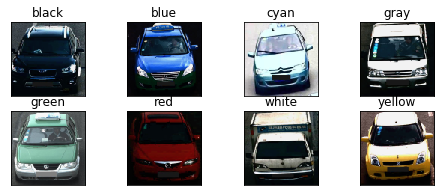

In [11]:
"""Print a random image per class"""
import matplotlib.pyplot as plt
import random
%matplotlib inline
fig = plt.figure(figsize=(8,3))
for i in range(8):
    
    ax = fig.add_subplot(2, 4, 1 + i, xticks=[], yticks=[])
    idx = random.choice(y[y==i].index)
    print(i,idx)
    features_idx = df[idx,::]
    #img_num = np.random.randint(features_idx.shape[0])
    #im = np.transpose(features_idx[img_num,::],(1,2,0))
    im = features_idx
    ax.set_title(d_b[i])
    plt.imshow(im[:,:,[2,1,0]],interpolation='nearest')
plt.show()

In [12]:
df=df.astype('float32')

In [13]:
"""Normalization of data. Note: a different normalization value will be required if using a color space apart from RGB"""
df=df/255

In [14]:
"""Train-test split"""
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


In [15]:
"""create validation data of size 1000"""
X_val=X_train[:1000]
partial_X_train=X_train[1000:]
y_val=y_train[:1000]
partial_y_train=y_train[1000:]


In [20]:
from keras import models
from keras import layers
from keras import optimizers

#del network
from keras import backend as K

# Some memory clean-up
K.clear_session()


In [21]:
"""for description on Model architecture refer to project report"""
network = models.Sequential()
network.add(layers.Conv2D(32, kernel_size=(3,3),padding="same",input_shape=(100,100,3),activation="relu"))
network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
network.add(layers.Conv2D(10, kernel_size=(2,2), activation='relu'))
network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))

network.add(layers.Dense(8, activation='softmax'))


In [22]:
"""Compile using either RMSprop of SGD with momentum 0.9 (similar outputs)"""
network.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),#SGD(momentum=0.9),
              metrics=['accuracy'])


In [23]:
"""Run for 30 epochs"""
history=network.fit(partial_X_train, partial_y_train, epochs=30,validation_data=(X_val,y_val))


Train on 8645 samples, validate on 1000 samples
Epoch 1/30
8645/8645 [==============================] - 7s 757us/step - loss: 0.7351 - acc: 0.7298 - val_loss: 0.4980 - val_acc: 0.7980
Epoch 2/30
8645/8645 [==============================] - 6s 736us/step - loss: 0.3627 - acc: 0.8662 - val_loss: 0.6193 - val_acc: 0.7520
Epoch 3/30
8645/8645 [==============================] - 6s 719us/step - loss: 0.2656 - acc: 0.9026 - val_loss: 0.3902 - val_acc: 0.8500
Epoch 4/30
8645/8645 [==============================] - 6s 738us/step - loss: 0.2005 - acc: 0.9234 - val_loss: 0.3002 - val_acc: 0.8960
Epoch 5/30
8645/8645 [==============================] - 6s 737us/step - loss: 0.1539 - acc: 0.9394 - val_loss: 0.3584 - val_acc: 0.8780
Epoch 6/30
8645/8645 [==============================] - 6s 719us/step - loss: 0.1167 - acc: 0.9593 - val_loss: 0.3376 - val_acc: 0.8830
Epoch 7/30
8645/8645 [==============================] - 6s 739us/step - loss: 0.0853 - acc: 0.9721 - val_loss: 0.6698 - val_acc: 0.8550


In [24]:
"""check performance on test data """
test_loss, test_acc = network.evaluate(X_test, y_test)
print(test_loss, test_acc)
#hazy images
#5149/5149 [==============================] - 2s 422us/step
#0.916966989037365 0.8657991842266008
#haze free images
#4752/4752 [==============================] - 2s 358us/step
#0.7896632951005599 0.9126683501683501

4752/4752 [==============================] - 2s 366us/step
0.9081808076610927 0.8979377104377104


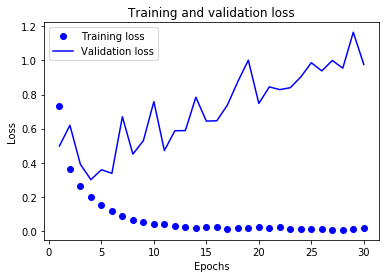

In [25]:
"""To visualize loss curves of training vs validation"""
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [31]:
"""re-train optimal model on entire training data """
K.clear_session()
network = models.Sequential()
network.add(layers.Conv2D(32, kernel_size=(3,3),padding="same",input_shape=(100,100,3),activation="relu"))
network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
network.add(layers.Conv2D(10, kernel_size=(2,2), activation='relu'))
network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))

network.add(layers.Dense(8, activation='softmax'))


network.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),#SGD(momentum=0.9),
              metrics=['accuracy'])

history=network.fit(X_train, y_train, epochs=7)


Epoch 1/7
9645/9645 [==============================] - 8s 791us/step - loss: 0.7107 - acc: 0.7426
Epoch 2/7
9645/9645 [==============================] - 6s 665us/step - loss: 0.3568 - acc: 0.8651
Epoch 3/7
9645/9645 [==============================] - 7s 680us/step - loss: 0.2606 - acc: 0.9014
Epoch 4/7
9645/9645 [==============================] - 7s 681us/step - loss: 0.1985 - acc: 0.9268
Epoch 5/7
9645/9645 [==============================] - 6s 661us/step - loss: 0.1538 - acc: 0.9454
Epoch 6/7
9645/9645 [==============================] - 7s 682us/step - loss: 0.1222 - acc: 0.9566
Epoch 7/7
9645/9645 [==============================] - 6s 667us/step - loss: 0.0879 - acc: 0.9687


In [32]:
"""evaluate optimal model on test data"""
test_loss, test_acc = network.evaluate(X_test, y_test)
print(test_loss, test_acc)
#hazy
#5149/5149 [==============================] - 3s 596us/step
#0.36521502827458946 0.8813361817018387
#haze free
#4752/4752 [==============================] - 2s 499us/step
#0.31179774408338445 0.906986531986532

4752/4752 [==============================] - 2s 405us/step
0.3087361407425468 0.9101430976430976


In [33]:
"""Precision and recall per class"""
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = network.predict_classes(X_test)
print(classification_report(Y_test, y_pred,target_names=list(d.keys())))
""" 
              precision    recall  f1-score   support

       black       0.94      0.96      0.95      1150
        blue       0.97      0.87      0.92       381
        cyan       0.92      0.96      0.94        91
        gray       0.88      0.74      0.81       984
       green       0.97      1.00      0.98       181
         red       0.98      0.93      0.95       341
       white       0.85      0.96      0.90      1426
      yellow       0.95      0.95      0.95       198

   micro avg       0.91      0.91      0.91      4752
   macro avg       0.93      0.92      0.92      4752
weighted avg       0.91      0.91      0.90      4752
"""

              precision    recall  f1-score   support

       black       0.95      0.92      0.94      1150
        blue       0.99      0.91      0.95       381
        cyan       0.97      0.92      0.94        91
        gray       0.84      0.81      0.83       984
       green       0.96      0.99      0.98       181
         red       0.98      0.94      0.96       341
       white       0.88      0.94      0.91      1426
      yellow       0.91      0.97      0.94       198

   micro avg       0.91      0.91      0.91      4752
   macro avg       0.93      0.93      0.93      4752
weighted avg       0.91      0.91      0.91      4752



' \n              precision    recall  f1-score   support\n\n       black       0.94      0.96      0.95      1150\n        blue       0.97      0.87      0.92       381\n        cyan       0.92      0.96      0.94        91\n        gray       0.88      0.74      0.81       984\n       green       0.97      1.00      0.98       181\n         red       0.98      0.93      0.95       341\n       white       0.85      0.96      0.90      1426\n      yellow       0.95      0.95      0.95       198\n\n   micro avg       0.91      0.91      0.91      4752\n   macro avg       0.93      0.92      0.92      4752\nweighted avg       0.91      0.91      0.90      4752\n'

In [34]:
"""Optimal network summary"""
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 10)        1290      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5760)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               737408    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
__________

In [35]:
"""Accuracy per class"""
test_acc=[]
for i in range(8):
    chk=np.array([np.argmax(y, axis=None, out=None)==i for y in y_test])
    test_acc.append(network.evaluate(X_test[chk,::],y_test[chk],verbose=0)[1])
    print(labels[i]," :: ",round(test_acc[i],2))
print(sum(test_acc)/len(test_acc))
"""black  ::  0.96
blue  ::  0.87
cyan  ::  0.96
gray  ::  0.74
green  ::  1.0
red  ::  0.93
white  ::  0.96
yellow  ::  0.95
0.9207616961659608"""

black  ::  0.92
blue  ::  0.91
cyan  ::  0.92
gray  ::  0.81
green  ::  0.99
red  ::  0.94
white  ::  0.94
yellow  ::  0.97
0.9265903008025059


'black  ::  0.96\nblue  ::  0.87\ncyan  ::  0.96\ngray  ::  0.74\ngreen  ::  1.0\nred  ::  0.93\nwhite  ::  0.96\nyellow  ::  0.95\n0.9207616961659608'

In [36]:
"""Save model and weights"""
network.save('vehicle_color_haze_free_model.h5')
network.save_weights('vehicle_color_model_haze_free_weights.h5')


In [37]:
"""The below cells try to look at intermediate outputs"""
layer_outputs = [layer.output for layer in network.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=network.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [38]:
print(len(layer_outputs))

8


In [91]:
activations = activation_model.predict(X_test[5,::].reshape(1,100,100,3)) # Returns a list of five Numpy arrays: one array per layer activation
print("class:",d_b[np.argmax(activations[len(activations)-1])])
print(len(activations[0:8]))

class: white
8


In [77]:
print(y_test[5])

[0. 0. 0. 0. 0. 0. 1. 0.]


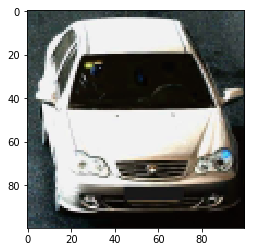

In [80]:
plt.imshow(X_test[5,::])

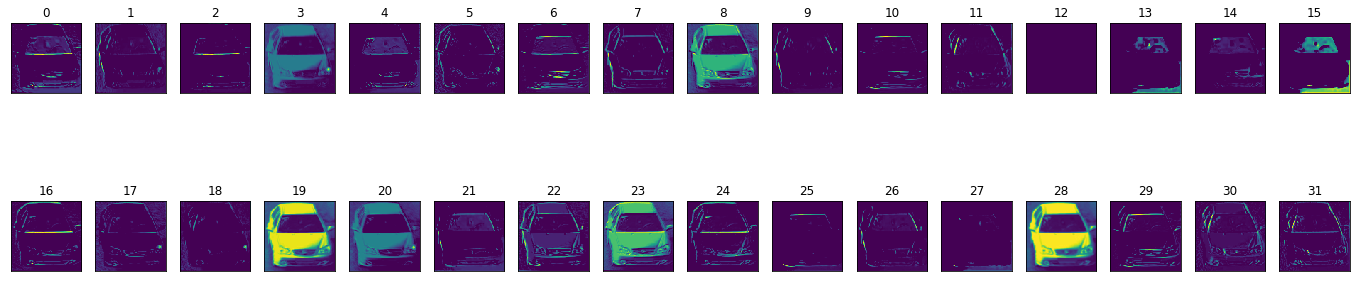

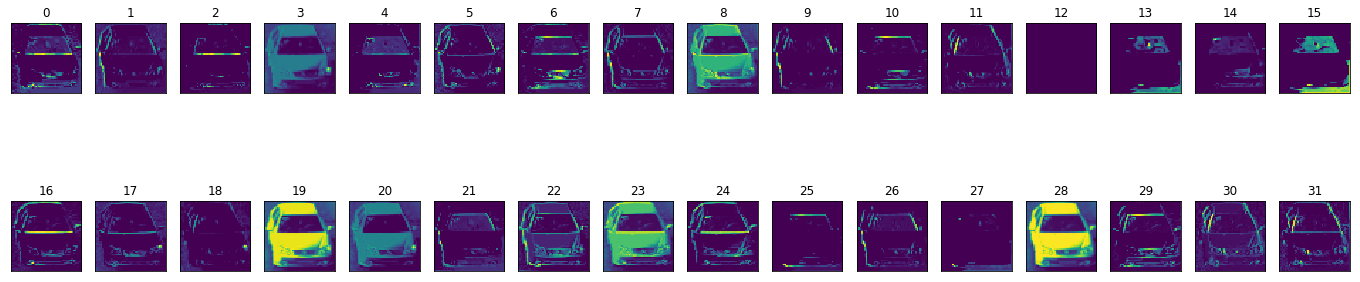

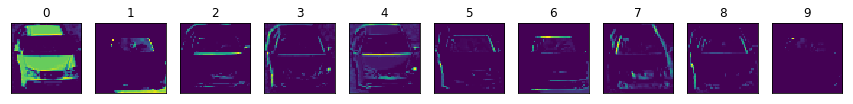

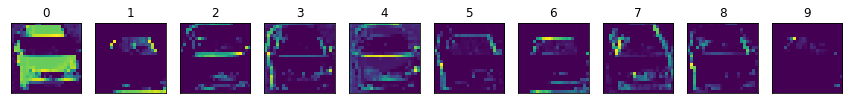

<Figure size 1728x432 with 0 Axes>

In [92]:
j=0
for first_layer_activation in activations:
    fig = plt.figure(figsize=(24,6))
    j=j+1
    if(j>4):
        break
    for i in range(first_layer_activation.shape[3]):
        ax = fig.add_subplot(2, 16, 1 + i, xticks=[], yticks=[])
        plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis',interpolation='nearest')
        ax.set_title(i)
        #print(i)
    plt.show()